<a href="https://colab.research.google.com/github/pujaroy280/DATA620WebAnalytics/blob/main/DATA_620_Week_3_Part_1_%26_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:



1.   [Brief Description:](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis) Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
2.   [Dataset](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat)
3.   [Python code to create dataset](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html)

What can you infer about the relationships between (1) the women, and (2) the social events?  



Group (The DataDriven Team): Susanna Wong, Puja Roy, Mikhail Broomes & Marjete Vucinaj & Danny

Video : https://drive.google.com/file/d/1LXDHOu_ACOf1wXbwxRbWlfdrO5dEPDcK/view?usp=sharing


## Data

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite

G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


# Degree (Unweighted Relationships)

Below shows the unweghted degree of each women, which indicates the number of other women she has attended at least one event with, counting the connections or friendships formed by co-attendance at each social event.

The following women are highly connected as they attend the events with 17 other women (degree=17):

*   Evelyn Jefferson
*   Theresa Anderson
*   Ruth DeSand
*   Verne Sanderson
*   Sylvia Avondale
*   Nora Fayette


Charlotte McDowd (degree = 11), Flora Price (degree = 12) and Olivia Carleton (degree = 12) are less connected with the other women.




In [ ]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")



#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


# Degree (Weighted Relationships)
It represents the total number of shared events with other women.

The following women are highly sociable as they frequently attend events with other women:
*   Theresa Anderson (57)
*   Evelyn Jefferson (50)
*   Brenda Rogers (46)
*   Sylvia Avondale (46)
*   Laura Mandeville (45)
*   Nora Fayette (43)

The following women are least sociable:

*   Charlotte McDowd (24)
*   Flora Price (14)
*   Olivia Carleton (14)


In [ ]:
# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

weights = [d['weight'] for u, v, d in W.edges(data=True)]



#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


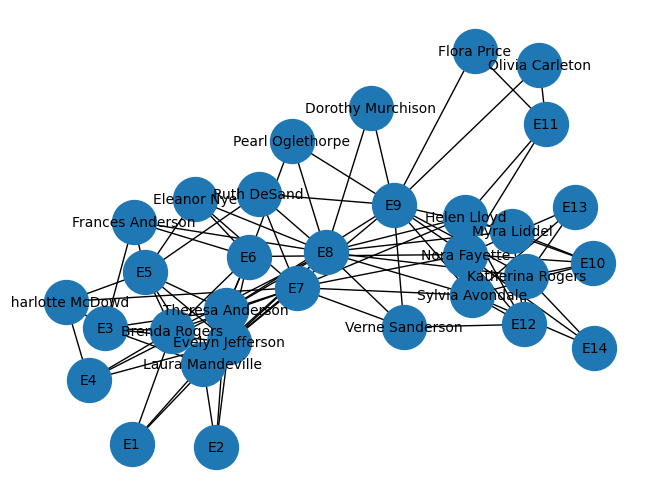

In [ ]:
pos = nx.spring_layout(G)  # Seed layout for reproducible node positions
nx.draw(G, pos, with_labels = True, font_size = 10, node_size = 1000,)
plt.figure(1, figsize= (30,20))
plt.show()

# Using the given code, it is so hard to visualize what is going on

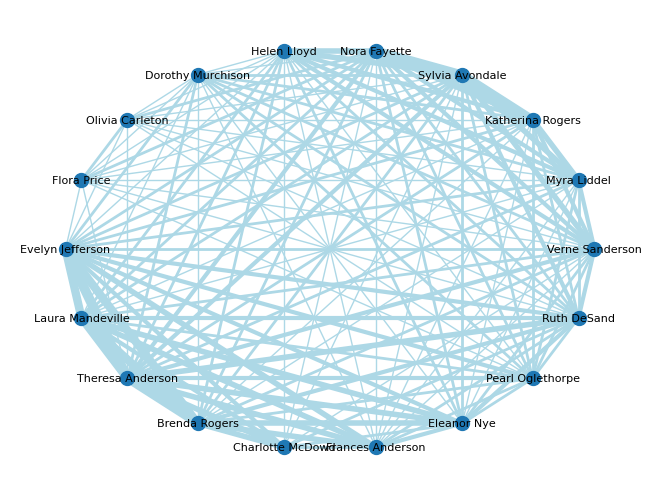

In [ ]:
pos = nx.shell_layout(W)  # Seed layout for reproducible node positions
nx.draw(W, pos, width = weights, with_labels = True, font_size = 8, node_size = 100,edge_color = "lightblue")
plt.figure(1, figsize= (30,20))
plt.show()

# Degree Centrality
Degree centrality focuses on the number of direct connections.

Below are the women with highest degree of centrality:

*   Theresa Anderson
*   Evelyn Jefferson
*   Nora Fayette

Below are the women with least degree of centrality:

*   Flora Price
*   Olivia Carleton
*   Dorothy Murchison

Below are the events with highest attendence by different women (highest degree of centrality):

*   E7, E8, E9

Below are the women with least attendence by different women (least degree of centrality):

*   E4, E10, E11



## Overall

In [ ]:
degree_centrality = nx.degree_centrality(G)

# Print degree centrality for each node
for node, centrality in degree_centrality.items():
    print(f"Node {node}: Degree Centrality = {centrality:.4f}")

Node Evelyn Jefferson: Degree Centrality = 0.2581
Node Laura Mandeville: Degree Centrality = 0.2258
Node Theresa Anderson: Degree Centrality = 0.2581
Node Brenda Rogers: Degree Centrality = 0.2258
Node Charlotte McDowd: Degree Centrality = 0.1290
Node Frances Anderson: Degree Centrality = 0.1290
Node Eleanor Nye: Degree Centrality = 0.1290
Node Pearl Oglethorpe: Degree Centrality = 0.0968
Node Ruth DeSand: Degree Centrality = 0.1290
Node Verne Sanderson: Degree Centrality = 0.1290
Node Myra Liddel: Degree Centrality = 0.1290
Node Katherina Rogers: Degree Centrality = 0.1935
Node Sylvia Avondale: Degree Centrality = 0.2258
Node Nora Fayette: Degree Centrality = 0.2581
Node Helen Lloyd: Degree Centrality = 0.1613
Node Dorothy Murchison: Degree Centrality = 0.0645
Node Olivia Carleton: Degree Centrality = 0.0645
Node Flora Price: Degree Centrality = 0.0645
Node E1: Degree Centrality = 0.0968
Node E2: Degree Centrality = 0.0968
Node E3: Degree Centrality = 0.1935
Node E4: Degree Centrality

## Women

The following women has a degree centrality of 1, indicating they are connect to all women in the projected graph and are highly central:

*   Evelyn Jefferson
*   Theresa Anderson
*   Ruth DeSand
*   Verne Sanderson
*   Sylvia Avondale
*   Nora Fayette
*   Helen Lloyd




In [ ]:
nx.degree_centrality(W)

{'Evelyn Jefferson': 1.0,
 'Laura Mandeville': 0.8823529411764706,
 'Theresa Anderson': 1.0,
 'Brenda Rogers': 0.8823529411764706,
 'Charlotte McDowd': 0.6470588235294118,
 'Frances Anderson': 0.8823529411764706,
 'Eleanor Nye': 0.8823529411764706,
 'Pearl Oglethorpe': 0.9411764705882353,
 'Ruth DeSand': 1.0,
 'Verne Sanderson': 1.0,
 'Myra Liddel': 0.9411764705882353,
 'Katherina Rogers': 0.9411764705882353,
 'Sylvia Avondale': 1.0,
 'Nora Fayette': 1.0,
 'Helen Lloyd': 1.0,
 'Dorothy Murchison': 0.9411764705882353,
 'Olivia Carleton': 0.7058823529411764,
 'Flora Price': 0.7058823529411764}

# Eigenvector Centrality

Eigenvector centrality considers the quality of connections (i.e., connections to well-connected nodes) and identifies nodes connected to other highly connected nodes, emphasizing indirect influence.

The following women are highly influencial:
*   Theresa Anderson
*   Evelyn Jefferson
*   Sylvia Avondale

The following women are least influencial:
*   Flora Price
*   Olivia Carleton
*   Dorothy Murchison


## Overall

In [ ]:
# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Print eigenvector centrality for each node
for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: Eigenvector Centrality = {centrality:.4f}")

Node Evelyn Jefferson: Eigenvector Centrality = 0.2367
Node Laura Mandeville: Eigenvector Centrality = 0.2187
Node Theresa Anderson: Eigenvector Centrality = 0.2620
Node Brenda Rogers: Eigenvector Centrality = 0.2213
Node Charlotte McDowd: Eigenvector Centrality = 0.1189
Node Frances Anderson: Eigenvector Centrality = 0.1478
Node Eleanor Nye: Eigenvector Centrality = 0.1615
Node Pearl Oglethorpe: Eigenvector Centrality = 0.1273
Node Ruth DeSand: Eigenvector Centrality = 0.1669
Node Verne Sanderson: Eigenvector Centrality = 0.1544
Node Myra Liddel: Eigenvector Centrality = 0.1321
Node Katherina Rogers: Eigenvector Centrality = 0.1558
Node Sylvia Avondale: Eigenvector Centrality = 0.1960
Node Nora Fayette: Eigenvector Centrality = 0.1866
Node Helen Lloyd: Eigenvector Centrality = 0.1419
Node Dorothy Murchison: Eigenvector Centrality = 0.0929
Node Olivia Carleton: Eigenvector Centrality = 0.0492
Node Flora Price: Eigenvector Centrality = 0.0492
Node E1: Eigenvector Centrality = 0.1004
Nod

In [ ]:
nx.eigenvector_centrality(W)

{'Evelyn Jefferson': 0.2535242050574115,
 'Laura Mandeville': 0.2309732711453131,
 'Theresa Anderson': 0.2535242050574115,
 'Brenda Rogers': 0.2309732711453131,
 'Charlotte McDowd': 0.17252687994275986,
 'Frances Anderson': 0.2309732711453131,
 'Eleanor Nye': 0.2309732711453131,
 'Pearl Oglethorpe': 0.24315691598127512,
 'Ruth DeSand': 0.25352420505741147,
 'Verne Sanderson': 0.25352420505741147,
 'Myra Liddel': 0.24315691598127512,
 'Katherina Rogers': 0.24315691598127512,
 'Sylvia Avondale': 0.25352420505741147,
 'Nora Fayette': 0.25352420505741147,
 'Helen Lloyd': 0.25352420505741147,
 'Dorothy Murchison': 0.24315691598127512,
 'Olivia Carleton': 0.18763937054214486,
 'Flora Price': 0.18763937054214486}

In [ ]:
#What do these values mean? Degree centrality focuses on the number of direct connections, while eigenvector centrality considers the quality of connections (i.e., connections to well-connected nodes).
# Degree centrality identifies nodes with many direct connections, while eigenvector centrality identifies nodes connected to other highly connected nodes, emphasizing indirect influence.
#We can see a high degree of correlaton between the degree centrality and the eigenvector centrality which may be due to the high level of clustering in the network.

# Conclusion

The following events has the most attendance by different women:
E7, E8, and E9

The following events has the least attendance by different women:
E4, E10, and E11

The following women are highly sociable and influencial (highest weighted, not weighted degree, degree centrality, and eigenvector centrality):

*   Theresa Anderson
*   Evelyn Jefferson

The following women are least sociable (least weighted, not weighted degree, degree centrality, and eigenvector centrality):

*   Flora Price
*   Olivia Carleton
